In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/AirPassengers.csv")

In [3]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [4]:
#converting the data to datetime  object
data["Month"] = pd.to_datetime(data["Month"])

In [5]:
data

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390


In [6]:
#changing the column to index
data = data.set_index(["Month"])

In [7]:
data

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<Axes: xlabel='Month'>

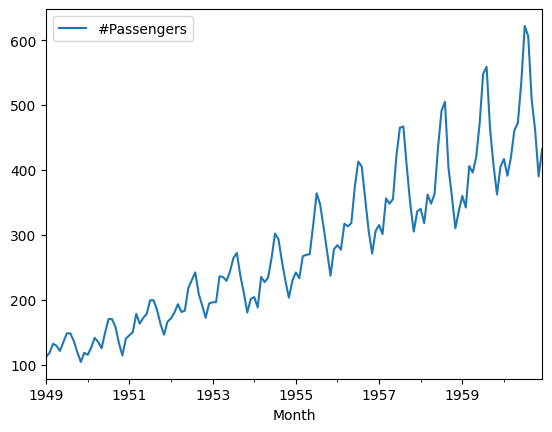

In [8]:
# Plotting the Time Series

data.plot()

In [9]:
#lets check if the data is stationary data or not

In [10]:
# to find the stationarity in data, we will use a statistical test i.e. adfuller test
# Augmented Dickey Fuller test

In [11]:
# here we will take two hypothesis

# 1) null hypothesis
# 2) Alternate Hypothesis

In [12]:
# To reject the null hypotheses, the following
# must be true:

# 1. If the p-value after the adfuller test is
# greater than 0.05, we fail to reject the
# hypotheses.

# 2. If the p-value is less than 0.05, we can
# reject the null hypotheses and assume
# that the time series is stationary.


# h0- data is not stationary
# h1 - data is stationary

In [14]:
from statsmodels.tsa.stattools import adfuller

In [16]:
result = adfuller(data["#Passengers"])
print(result)

(0.8153688792060498, 0.991880243437641, 13, 130, {'1%': -3.4816817173418295, '5%': -2.8840418343195267, '10%': -2.578770059171598}, 996.692930839019)


In [17]:
if(result[1]>0.05):
  print("The data is not stationary")

else:
  print("The data is stationary")

The data is not stationary


In [18]:
#seasonal decompose : It plots the components of the time series data

from statsmodels.tsa.seasonal import seasonal_decompose

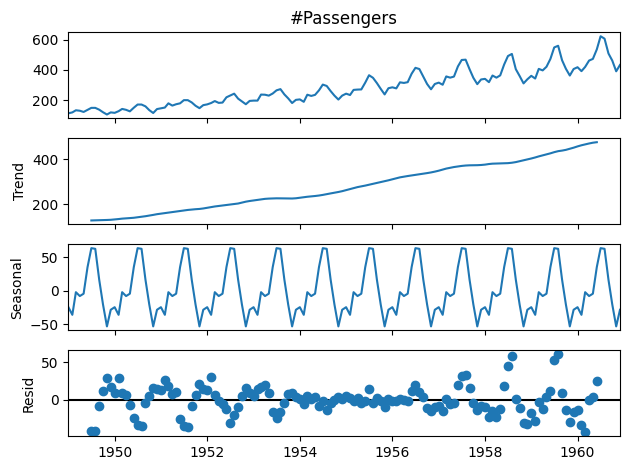

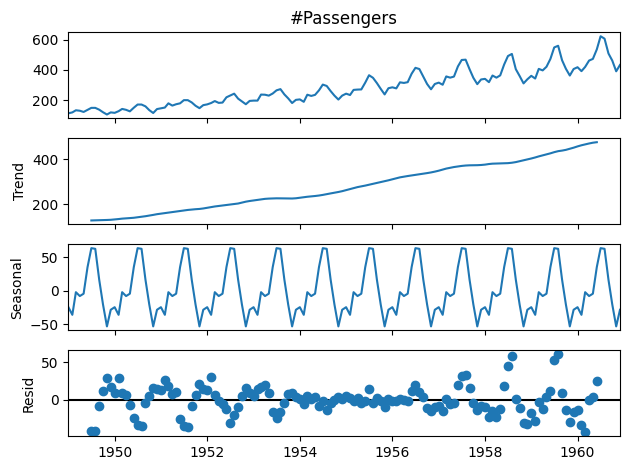

In [19]:
decomposition = seasonal_decompose(data["#Passengers"])
decomposition.plot()

ROLLING STATISTICS:

Rolling statistics is a very useful operation for time series data. Rolling mean creats a rolling window with a specified size and perform calculation on the data in this window which ofcourse rolls through the data.

Rolling stats also helps us to plot the mean and the standard deviation

In [24]:
mean_log = data.rolling(window=12).mean()
std_log = data.rolling(window=12).std()

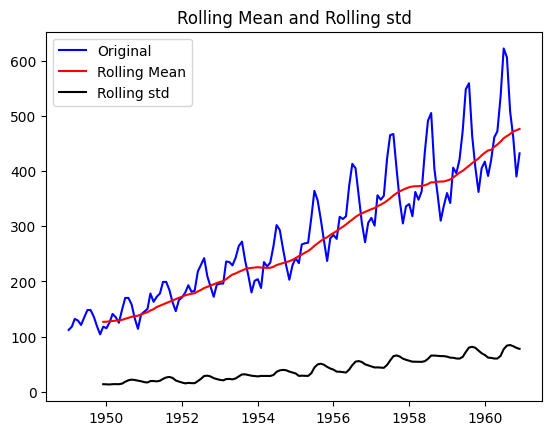

In [25]:
import matplotlib.pyplot as plt
# Plotting the data
plt.plot(data, color="blue", label="Original")
plt.plot(mean_log, color="red", label="Rolling Mean")
plt.plot(std_log, color="black", label="Rolling std")
# Adding legend and title
plt.legend(loc="best")
plt.title("Rolling Mean and Rolling std")
# Displaying the plot
plt.show()


In [26]:
#transformation

first_log = np.log(data)
first_log = first_log.dropna()

In [27]:
#calculating the mean and the standard deviation of the logged data
mean_log = first_log.rolling(window=12).mean()
std_log = first_log.rolling(window=12).std()

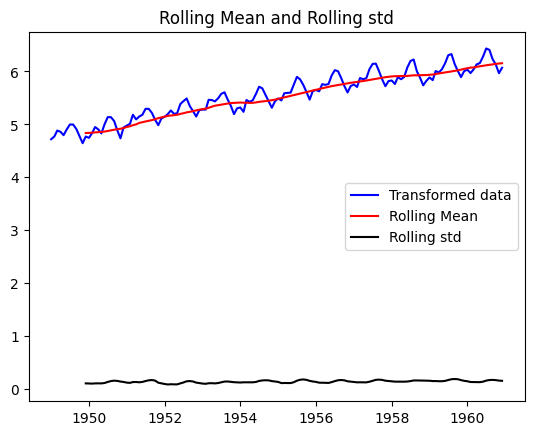

In [28]:
import matplotlib.pyplot as plt
# Plotting the data
plt.plot(first_log, color="blue", label="Transformed data")
plt.plot(mean_log, color="red", label="Rolling Mean")
plt.plot(std_log, color="black", label="Rolling std")
# Adding legend and title
plt.legend(loc="best")
plt.title("Rolling Mean and Rolling std")
# Displaying the plot
plt.show()


In [29]:
#subtracting the orignal data from the transformed data
new_data = first_log - mean_log
new_data = new_data.dropna()

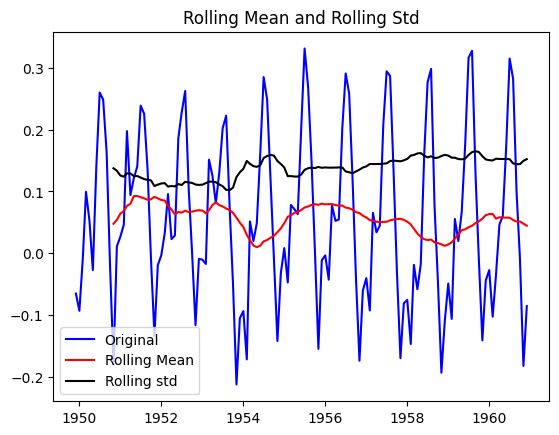

In [30]:
mean_log = new_data.rolling(window=12).mean()
std_log = new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original')
plt.plot(mean_log,color='red',label='Rolling Mean')
plt.plot(std_log,color='black',label='Rolling std')
plt.legend(loc='best')
plt.title('Rolling Mean and Rolling Std')
plt.show()

In [31]:
from statsmodels.tsa.stattools import adfuller

In [32]:
result = adfuller(new_data)
result

(-3.1629079913008833,
 0.022234630001242206,
 13,
 119,
 {'1%': -3.4865346059036564,
  '5%': -2.8861509858476264,
  '10%': -2.579896092790057},
 -436.63269481747034)

In [33]:
if(result[1]>0.05):
    print("The series is not stationary")
else:
    print("series is stationary")

series is stationary


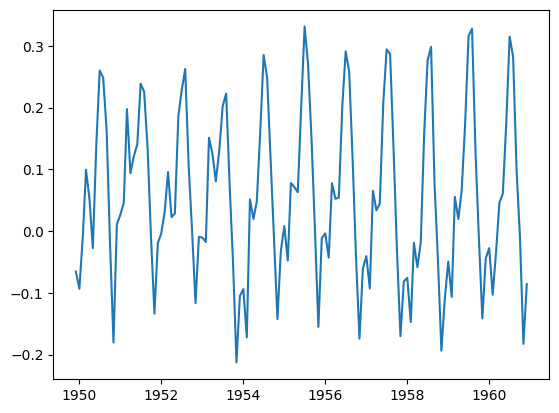

In [34]:
plt.plot(new_data)
plt.show()

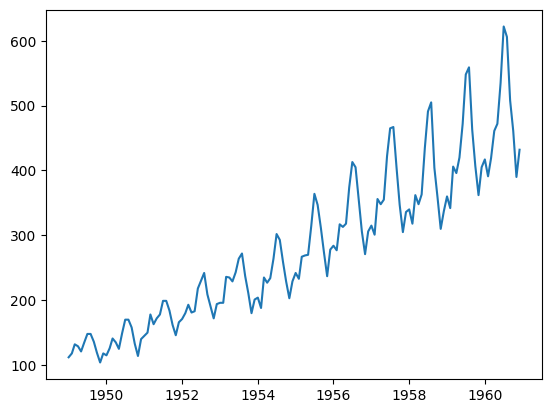

In [35]:
plt.plot(data)
plt.show()

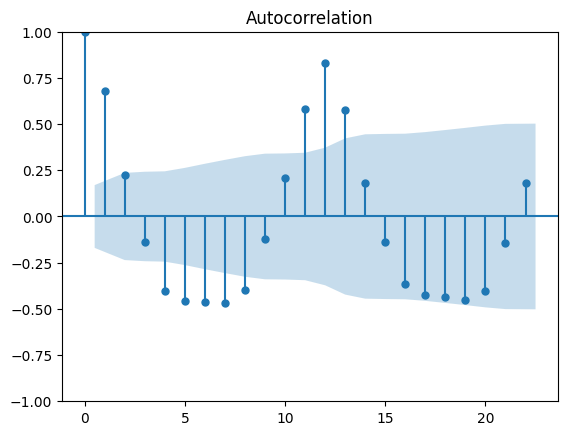

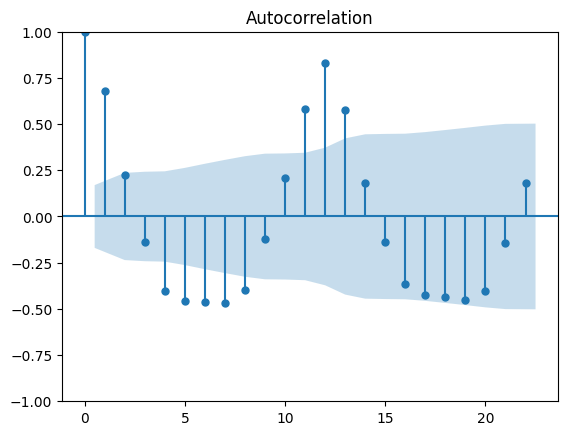

In [36]:
# Autocorrelation

from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(new_data.dropna()) #=--------> value of q

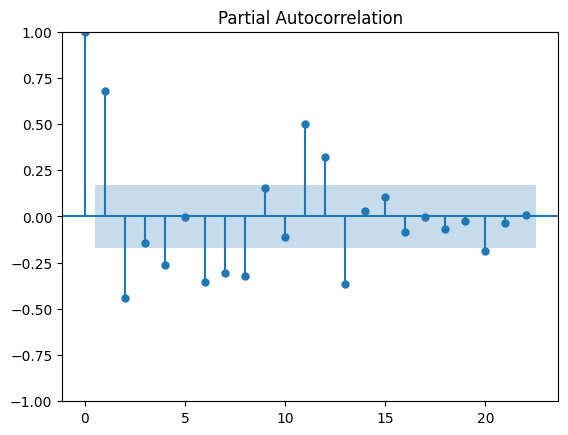

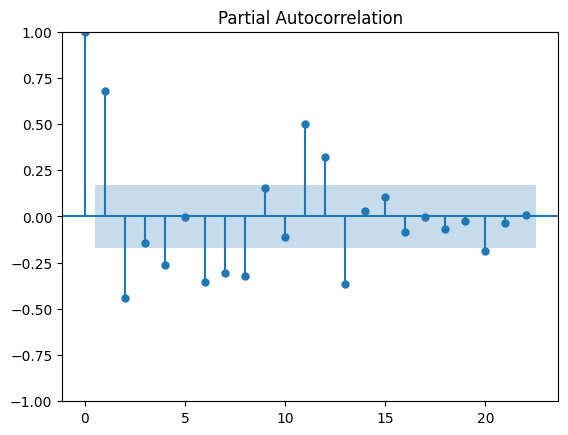

In [37]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(new_data.dropna())  #---------> value of p

In [38]:
train = new_data.iloc[:120]
test = new_data[121:]

In [39]:
from statsmodels.tsa.arima.model import ARIMA

In [40]:
model = ARIMA(train, order=(2,1,2))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<Axes: xlabel='Month'>

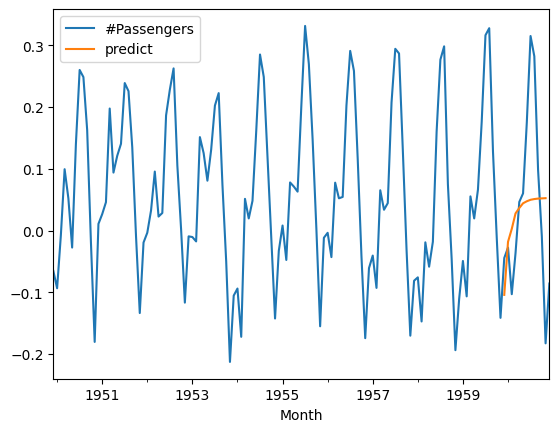

In [41]:
new_data['predict']=model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)
new_data[['#Passengers','predict']].plot()

In [42]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [43]:
model=SARIMAX(train,order=(2,1,2),seasonal_order=(2,1,2,12))
model=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<Axes: xlabel='Month'>

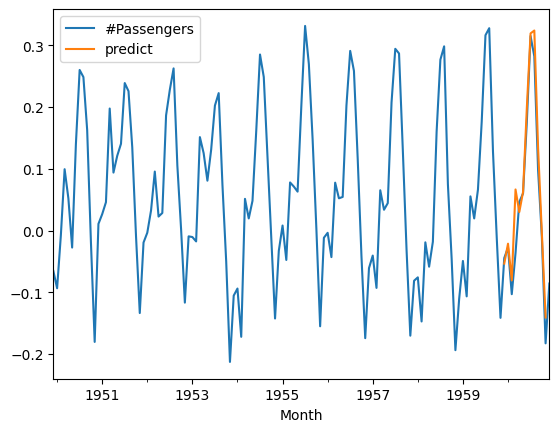

In [44]:
new_data['predict']=model.predict(start=len(train), end=len(train)+len(test)-1,dynamic=True)
new_data[['#Passengers','predict']].plot()

<Axes: xlabel='Month'>

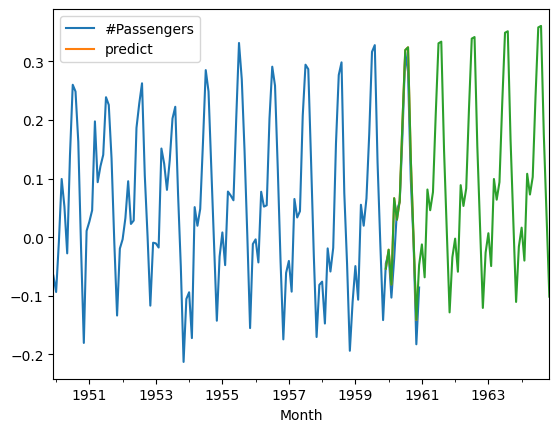

In [45]:
forecast = model.forecast(steps = 60)
new_data.plot()
forecast.plot()

<Axes: >

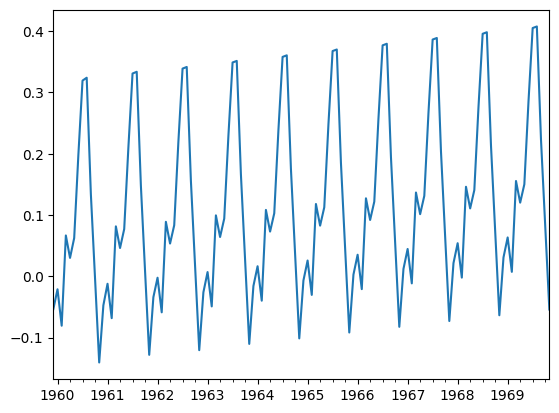

In [47]:
forecast = model.forecast(steps = 120)
# new_data.plot()
forecast.plot()